In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn 
from sklearn.metrics import classification_report, roc_curve, mean_squared_error, mean_absolute_error
import datetime as dt
from sklearn.metrics import mean_absolute_percentage_error

from datetime import datetime
import plotly.express as px

import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline


In [2]:
df = pd.read_csv("electricity_bill_dataset.csv")

In [3]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [5]:
#looking at null values
df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [6]:
df.corr()

ValueError: could not convert string to float: 'Hyderabad'

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [7]:
X=df.drop(['ElectricityBill','Company','City'],axis=1)
y=df[['ElectricityBill']]

In [8]:
y.head()

,ElectricityBill
0,3225.6
1,3806.4
2,3203.2
3,4370.0
4,4204.4


# Feature Selection

# mutual_info_regression

In [9]:
from sklearn.feature_selection import mutual_info_regression

In [10]:
# Calculate the information gain for each feature
info_gains = mutual_info_regression(X, y)

In [11]:
feature_info_gains = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gains})

In [12]:
sorted_features = feature_info_gains.sort_values(by='Information Gain', ascending=False)

In [13]:
sorted_features

,Feature,Information Gain
7,MonthlyHours,5.445351
8,TariffRate,2.116969
0,Fan,0.100750
3,Television,0.098236
1,Refrigerator,0.087583
4,Monitor,0.067697
2,AirConditioner,0.035868
6,Month,0.004280
5,MotorPump,0.000000


In [14]:
# Select the top-k features with the highest information gains#0.03
k = 8  # Set the desired number of selected features
selected_features = sorted_features.head(k)['Feature'].tolist()

In [15]:
selected_features

['MonthlyHours',
 'TariffRate',
 'Fan',
 'Television',
 'Refrigerator',
 'Monitor',
 'AirConditioner',
 'Month']

In [16]:
# Create a new DataFrame containing only the selected features
df_selected = df[selected_features]

# Display the new DataFrame
print("DataFrame with Selected Features:")
df_selected.head()

DataFrame with Selected Features:


,MonthlyHours,TariffRate,Fan,Television,Refrigerator,Monitor,AirConditioner,Month
0,384,8.4,16,6.0,23.0,1.0,2.0,10
1,488,7.8,19,3.0,22.0,1.0,2.0,5
2,416,7.7,7,6.0,20.0,7.0,2.0,7
3,475,9.2,7,21.0,22.0,1.0,3.0,6
4,457,9.2,11,11.0,23.0,1.0,2.0,2


In [17]:
x = df_selected

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Generalized Additive Models (GAM)

In [19]:
from pygam import LinearGAM, s, f

In [20]:
model1 = LinearGAM(s(0) + s(1) + s(2)).fit(xtrain, ytrain)


In [21]:
predictions = model1.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.52628043107528
R2 score on Test Set: 0.9956346556629285
Mean Squared Error (MSE): 4973.956231442671
Mean Absolute Error (MAE): 49.22799076796036
Mean Absolute Percentage Error (MAPE) on Test Set: 0.01306804120995681


# Least Angle Regression (LARS)

In [22]:
from sklearn.linear_model import Lars

In [23]:
model2 = Lars().fit(xtrain, ytrain)

In [24]:
predictions = model2.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.49629910886931
R2 score on Test Set: 0.9956383663641158
Mean Squared Error (MSE): 4969.728188047168
Mean Absolute Error (MAE): 49.19376087975486
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013062828792044467


# HuberRegressor

In [19]:
from sklearn.linear_model import HuberRegressor

In [20]:
model3 = HuberRegressor().fit(xtrain, ytrain)

In [21]:
predictions = model3.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 220.4873693763684
R2 score on Test Set: 0.9573337986102571
Mean Squared Error (MSE): 48614.68005451112
Mean Absolute Error (MAE): 175.91594546591304
Mean Absolute Percentage Error (MAPE) on Test Set: 0.04335806618274287


# RANSACRegressor

In [22]:
from sklearn.linear_model import RANSACRegressor

In [23]:

model4 = RANSACRegressor().fit(xtrain, ytrain)

In [24]:
predictions = model4.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.49629910886925
R2 score on Test Set: 0.9956383663641158
Mean Squared Error (MSE): 4969.728188047159
Mean Absolute Error (MAE): 49.19376087975428
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013062828792044439


# XGBRegressor

In [25]:
from xgboost import XGBRegressor
model5 = XGBRegressor().fit(xtrain, ytrain)

In [26]:
predictions = model5.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10.495190511431762
R2 score on Test Set: 0.9999033287799055
Mean Squared Error (MSE): 110.1490238712473
Mean Absolute Error (MAE): 7.788003049752252
Mean Absolute Percentage Error (MAPE) on Test Set: 0.0019408006344632592


# PLSRegression

In [27]:
from sklearn.cross_decomposition import PLSRegression

In [28]:
model6 = PLSRegression(n_components=2).fit(xtrain, ytrain)

In [29]:
predictions = model6.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 256.1324310892224
R2 score on Test Set: 0.942423443100747
Mean Squared Error (MSE): 65603.82225567526
Mean Absolute Error (MAE): 210.37600485304935
Mean Absolute Percentage Error (MAPE) on Test Set: 0.05218873074509327


# Extra Tree 

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model7 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model7.fit(xtrain, ytrain)


ExtraTreesRegressor(random_state=42)

In [31]:
predictions = model7.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 3.5997903209694595
R2 score on Test Set: 0.9999886271069033
Mean Squared Error (MSE): 12.958490354945404
Mean Absolute Error (MAE): 1.376045760282539
Mean Absolute Percentage Error (MAPE) on Test Set: 0.00036835975203205166


# lightgbm

In [32]:
import lightgbm as lgb
model8 = lgb.LGBMRegressor(random_state=42)  
model8.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 36276, number of used features: 8
[LightGBM] [Info] Start training from score 4311.513883


LGBMRegressor(random_state=42)

In [33]:
predictions = model8.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 16.154733978789356
R2 score on Test Set: 0.9997709574507435
Mean Squared Error (MSE): 260.97542992545135
Mean Absolute Error (MAE): 9.71769980602126
Mean Absolute Percentage Error (MAPE) on Test Set: 0.002680556094134097


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming model1, model2, ..., model8 are defined and trained somewhere earlier in your code
# Assuming ytest and xtest are defined and contain your test data

# Create the DataFrame to hold R² scores
allacc = pd.DataFrame(columns=["R2 Score"], index=["GAM", "LARS", "HR",
                                                   "RANS", "XGB",
                                                   "PLS", "ET",
                                                   "LGB"])

# Dictionary of models
models = {'GAM': model1, 'LARS': model2, 'HR': model3, 'RANS': model4,
          'XGB': model5, 'PLS': model6, 'ET': model7,
          'LGB': model8}

# Calculate the R² score for each model and store it in the DataFrame
for name, model in models.items():
    allacc.loc[name, 'R2 Score'] = r2_score(ytest, model.predict(xtest))

# Plot the bar plot with only model names on the x-axis
allacc.plot(kind='bar', legend=False, figsize=(12, 7), title='Final Models Accuracy')

# Set the x-axis label to 'Model'
plt.xlabel("Model's Name")

# Set the y-axis label to 'R² Score'
plt.ylabel('R² Score')

# Show the plot
plt.show()


# Feature Selection

# Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X, y)

In [117]:
X.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,0,10,384,8.4
1,19,22.0,2.0,3.0,1.0,0,5,488,7.8
2,7,20.0,2.0,6.0,7.0,0,7,416,7.7
3,7,22.0,3.0,21.0,1.0,0,6,475,9.2
4,11,23.0,2.0,11.0,1.0,0,2,457,9.2


In [118]:
feature_importances = model.feature_importances_

In [119]:
feature_importances

array([6.23551486e-06, 2.44326623e-06, 2.28048181e-06, 6.30859759e-06,
       6.96276762e-07, 0.00000000e+00, 5.93643524e-06, 9.20211810e-01,
       7.97642895e-02])

In [125]:
# Assuming 'df' is the DataFrame containing the features
feature_importance_dict = {}

# Replace 'df' with your actual DataFrame variable name
for feature, importance in zip(df.columns, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


Feature Importances:
City: 0.9202118099267715
Company: 0.07976428950074613
Television: 6.30859758907657e-06
Fan: 6.235514858073898e-06
Month: 5.93643524034629e-06
Refrigerator: 2.443266225201722e-06
AirConditioner: 2.280481807403603e-06
Monitor: 6.962767621444834e-07
MotorPump: 0.0


In [126]:
import pandas as pd

# Create a dictionary to store feature importance values
feature_importance_dict = {}
for feature, importance in zip(X.columns, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

# Take the top 7 features
top_features = [f[0] for f in sorted_feature_importances[:7]]

# Create a new dataframe with the top 7 features
top_features_df = pd.DataFrame(X[top_features], columns=top_features)


top_features_df.head()
# cut off values 10'^-6

Feature Importances:
MonthlyHours: 0.9202118099267715
TariffRate: 0.07976428950074613
Television: 6.30859758907657e-06
Fan: 6.235514858073898e-06
Month: 5.93643524034629e-06
Refrigerator: 2.443266225201722e-06
AirConditioner: 2.280481807403603e-06
Monitor: 6.962767621444834e-07
MotorPump: 0.0


,MonthlyHours,TariffRate,Television,Fan,Month,Refrigerator,AirConditioner
0,384,8.4,6.0,16,10,23.0,2.0
1,488,7.8,3.0,19,5,22.0,2.0
2,416,7.7,6.0,7,7,20.0,2.0
3,475,9.2,21.0,7,6,22.0,3.0
4,457,9.2,11.0,11,2,23.0,2.0


In [127]:
x = top_features_df

In [128]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Generalized Additive Models (GAM)

In [129]:
model1 = LinearGAM(s(0) + s(1) + s(2)).fit(xtrain, ytrain)

In [130]:
predictions = model1.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.53279352693099
R2 score on Test Set: 0.99563384934736
Mean Squared Error (MSE): 4974.874962712678
Mean Absolute Error (MAE): 49.233177552112714
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013070466964173319


# Least Angle Regression (LARS)

In [131]:
model2 = Lars().fit(xtrain, ytrain)

In [132]:
predictions = model2.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.4968576060561
R2 score on Test Set: 0.9956382972549627
Mean Squared Error (MSE): 4969.806932328549
Mean Absolute Error (MAE): 49.19464700300407
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013063057309391243


# HuberRegressor

In [133]:
model3 = HuberRegressor().fit(xtrain, ytrain)

In [134]:
predictions = model3.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 220.67292657581507
R2 score on Test Set: 0.9572619545653448
Mean Squared Error (MSE): 48696.54052353506
Mean Absolute Error (MAE): 173.91841959792998
Mean Absolute Percentage Error (MAPE) on Test Set: 0.04344952904955605


# RANSACRegressor

In [135]:

model4 = RANSACRegressor().fit(xtrain, ytrain)

In [136]:
predictions = model4.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.496857606056
R2 score on Test Set: 0.9956382972549628
Mean Squared Error (MSE): 4969.806932328535
Mean Absolute Error (MAE): 49.19464700300355
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013063057309391243


# XGBRegressor

In [137]:
model5 = XGBRegressor().fit(xtrain, ytrain)

In [138]:
predictions = model5.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10.902148746356616
R2 score on Test Set: 0.9998956864433286
Mean Squared Error (MSE): 118.85684728768514
Mean Absolute Error (MAE): 7.902575227293872
Mean Absolute Percentage Error (MAPE) on Test Set: 0.001958240887308514


# PLSRegression

In [139]:
from sklearn.cross_decomposition import PLSRegression

In [140]:
model6 = PLSRegression(n_components=2).fit(xtrain, ytrain)

In [141]:
predictions = model6.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 239.2143580112626
R2 score on Test Set: 0.9497783434994598
Mean Squared Error (MSE): 57223.509078740506
Mean Absolute Error (MAE): 193.94280460266123
Mean Absolute Percentage Error (MAPE) on Test Set: 0.048442586637766245


# Extra Tree 

In [142]:
model7 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model7.fit(xtrain, ytrain)


ExtraTreesRegressor(random_state=42)

In [143]:
predictions = model7.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 3.44886124427128
R2 score on Test Set: 0.9999895607814189
Mean Squared Error (MSE): 11.894643882236442
Mean Absolute Error (MAE): 1.3595818723125181
Mean Absolute Percentage Error (MAPE) on Test Set: 0.000366843826498996


# lightgbm

In [144]:
model8 = lgb.LGBMRegressor(random_state=42)  
model8.fit(xtrain, ytrain)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 36276, number of used features: 7
[LightGBM] [Info] Start training from score 4311.513883


LGBMRegressor(random_state=42)

In [145]:
predictions = model8.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 16.164563590524466
R2 score on Test Set: 0.999770678636585
Mean Squared Error (MSE): 261.2931160721092
Mean Absolute Error (MAE): 9.747651144136343
Mean Absolute Percentage Error (MAPE) on Test Set: 0.00269146086430387


In [ ]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["GAM", "LARS",
                                                  "HuberRegressor","RANSACRegressor","XGBRegressor","PLSRegression","ExtraTreesRegressor","lightgbm"])
models = {'GAM' : model1, 'LARS' : model2, 'HuberRegressor' : model3, 'RANSACRegressor' : model4, 'XGBRegressor': model5,
         'PLSRegression': model6, 'ExtraTreesRegressor': model7, 'lightgbm': model8}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(ytest, y_pred = model.predict(xtest))

In [ ]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')

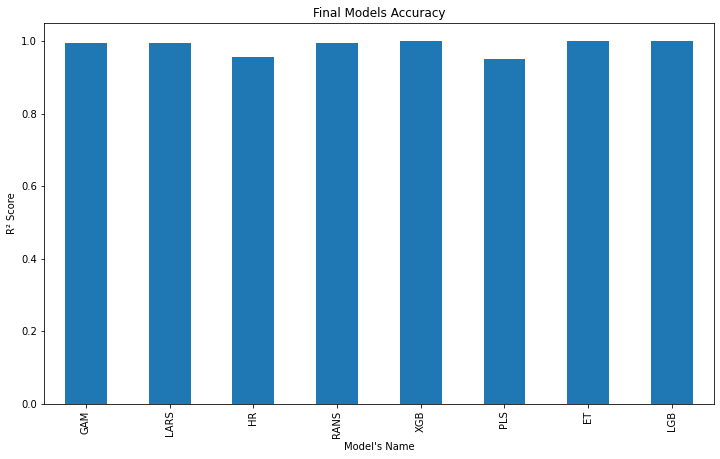

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming model1, model2, ..., model8 are defined and trained somewhere earlier in your code
# Assuming ytest and xtest are defined and contain your test data

# Create the DataFrame to hold R² scores
allacc = pd.DataFrame(columns=["R2 Score"], index=["GAM", "LARS", "HR",
                                                   "RANS", "XGB",
                                                   "PLS", "ET",
                                                   "LGB"])

# Dictionary of models
models = {'GAM': model1, 'LARS': model2, 'HR': model3, 'RANS': model4,
          'XGB': model5, 'PLS': model6, 'ET': model7,
          'LGB': model8}

# Calculate the R² score for each model and store it in the DataFrame
for name, model in models.items():
    allacc.loc[name, 'R2 Score'] = r2_score(ytest, model.predict(xtest))

# Plot the bar plot with only model names on the x-axis
allacc.plot(kind='bar', legend=False, figsize=(12, 7), title='Final Models Accuracy')

# Set the x-axis label to 'Model'
plt.xlabel("Model's Name")

# Set the y-axis label to 'R² Score'
plt.ylabel('R² Score')

# Show the plot
plt.show()


# LASSO

In [94]:
from sklearn.linear_model import Lasso

In [95]:
import pandas as pd

# Generate some example data
# X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Fit the model
lasso.fit(X, y)

# Print coefficients of all features
print("Coefficients of all features:")
for feature, coefficient in enumerate(lasso.coef_):
    print(f"Feature {feature} (Column '{X.columns[feature]}'): {coefficient}")
    
# Create a DataFrame with all feature values
df_all_features = pd.DataFrame(X, columns=X.columns)

# Select the best 7 features based on their absolute coefficient values
selected_indices = np.argsort(np.abs(lasso.coef_))[::-1][:7]
selected_features = df_all_features.iloc[:, selected_indices]

# Print the indices of the selected features
print("\nIndices of the selected features:")
print(selected_indices)

# Print the DataFrame with the selected features
print("\nDataFrame with the selected features:")
selected_features.head()
# cut off values  0.0

Coefficients of all features:
Feature 0 (Column 'Fan'): -0.008268974764121346
Feature 1 (Column 'Refrigerator'): 0.3897802034009638
Feature 2 (Column 'AirConditioner'): 0.08941421316595888
Feature 3 (Column 'Television'): -0.08089633835804641
Feature 4 (Column 'Monitor'): 0.04548805406941919
Feature 5 (Column 'MotorPump'): 0.0
Feature 6 (Column 'Month'): -0.010563934421781496
Feature 7 (Column 'MonthlyHours'): 8.371138361391733
Feature 8 (Column 'TariffRate'): 514.6699369129102

Indices of the selected features:
[8 7 1 2 3 4 6]

DataFrame with the selected features:


,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
0,8.4,384,23.0,2.0,6.0,1.0,10
1,7.8,488,22.0,2.0,3.0,1.0,5
2,7.7,416,20.0,2.0,6.0,7.0,7
3,9.2,475,22.0,3.0,21.0,1.0,6
4,9.2,457,23.0,2.0,11.0,1.0,2


In [96]:
x= selected_features

In [97]:
x.head()

,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
0,8.4,384,23.0,2.0,6.0,1.0,10
1,7.8,488,22.0,2.0,3.0,1.0,5
2,7.7,416,20.0,2.0,6.0,7.0,7
3,9.2,475,22.0,3.0,21.0,1.0,6
4,9.2,457,23.0,2.0,11.0,1.0,2


In [98]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
xtrain.head()

,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
12362,8.3,512,22.0,1.0,12.0,1.0,9
26357,8.2,577,23.0,3.0,11.0,12.0,2
22319,9.1,514,22.0,1.0,12.0,12.0,1
32505,7.7,565,22.0,1.0,3.0,1.0,10
43651,7.4,429,20.0,2.0,20.0,7.0,4


# Generalized Additive Models (GAM)

In [100]:
from pygam import LinearGAM, s, f
model1 = LinearGAM(s(0) + s(1) + s(2)).fit(xtrain, ytrain)
predictions = model1.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.52359330649847
R2 score on Test Set: 0.995634988304903
Mean Squared Error (MSE): 4973.577212860396
Mean Absolute Error (MAE): 49.21877893164924
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013068231709690882


# Least Angle Regression (LARS)

In [101]:
from sklearn.linear_model import Lars
model2 = Lars().fit(xtrain, ytrain)
predictions = model2.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")


Root Mean Squared Error (RMSE) on Test Set: 70.49540434440546
R2 score on Test Set: 0.9956384770822688
Mean Squared Error (MSE): 4969.60203368122
Mean Absolute Error (MAE): 49.19331594696621
Mean Absolute Percentage Error (MAPE) on Test Set: 0.013062471749878056


# HuberRegressor

In [102]:
from sklearn.linear_model import HuberRegressor
model3 = HuberRegressor().fit(xtrain, ytrain)
predictions = model3.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 227.75973243471574
R2 score on Test Set: 0.9544728530796646
Mean Squared Error (MSE): 51874.495718733306
Mean Absolute Error (MAE): 178.39802849230406
Mean Absolute Percentage Error (MAPE) on Test Set: 0.044674734237827654


# RANSACRegressor

In [103]:
from sklearn.linear_model import RANSACRegressor

model4 = RANSACRegressor().fit(xtrain, ytrain)
predictions = model4.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 70.49540434440546
R2 score on Test Set: 0.9956384770822688
Mean Squared Error (MSE): 4969.602033681219
Mean Absolute Error (MAE): 49.19331594696563
Mean Absolute Percentage Error (MAPE) on Test Set: 0.01306247174987825


# XGBRegressor

In [104]:
from xgboost import XGBRegressor
model5 = XGBRegressor().fit(xtrain, ytrain)
predictions = model5.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 10.988252932449878
R2 score on Test Set: 0.9998940322184667
Mean Squared Error (MSE): 120.74170250749334
Mean Absolute Error (MAE): 8.053999900502399
Mean Absolute Percentage Error (MAPE) on Test Set: 0.001979336693805339


# PLSRegression

In [105]:
from sklearn.cross_decomposition import PLSRegression
model6 = PLSRegression(n_components=2).fit(xtrain, ytrain)
predictions = model6.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 198.61239160613687
R2 score on Test Set: 0.9653798273696766
Mean Squared Error (MSE): 39446.882099509465
Mean Absolute Error (MAE): 159.7553057187308
Mean Absolute Percentage Error (MAPE) on Test Set: 0.04154965147808493


# ExtraTreesRegressor

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
model7 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model7.fit(xtrain, ytrain)
predictions = model7.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

Root Mean Squared Error (RMSE) on Test Set: 3.731282808094237
R2 score on Test Set: 0.9999877810783148
Mean Squared Error (MSE): 13.922471393979617
Mean Absolute Error (MAE): 1.2873743521893215
Mean Absolute Percentage Error (MAPE) on Test Set: 0.0003475945299691961


# lightgbm

In [107]:
import lightgbm as lgb
model8 = lgb.LGBMRegressor(random_state=42)  
model8.fit(xtrain, ytrain)
predictions = model8.predict(xtest)

# Evaluating the model performance
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


acc = r2_score(ytest, predictions)
print(f"R2 score on Test Set: {acc}")
mse = mean_squared_error(ytest, predictions)
print("Mean Squared Error (MSE):", mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(ytest, predictions)
print("Mean Absolute Error (MAE):", mae)
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(ytest, predictions)

print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 36276, number of used features: 7
[LightGBM] [Info] Start training from score 4311.513883
Root Mean Squared Error (RMSE) on Test Set: 16.114018397731932
R2 score on Test Set: 0.9997721105305286
Mean Squared Error (MSE): 259.66158892244323
Mean Absolute Error (MAE): 9.766563400028103
Mean Absolute Percentage Error (MAPE) on Test Set: 0.002691349911162166


In [108]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["GAM", "LARS",
                                                  "HuberRegressor","RANSACRegressor","XGBRegressor","PLSRegression","ExtraTreesRegressor","lightgbm"])
models = {'GAM' : model1, 'LARS' : model2, 'HuberRegressor' : model3, 'RANSACRegressor' : model4, 'XGBRegressor': model5,
         'PLSRegression': model6, 'ExtraTreesRegressor': model7, 'lightgbm': model8}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = r2_score(ytest, y_pred = model.predict(xtest))

In [109]:
allacc

,Accuracy
GAM,0.995635
LARS,0.995638
HuberRegressor,0.954473
RANSACRegressor,0.995638
XGBRegressor,0.999894
PLSRegression,0.96538
ExtraTreesRegressor,0.999988
lightgbm,0.999772


<AxesSubplot:title={'center':'Final models accuracy'}>

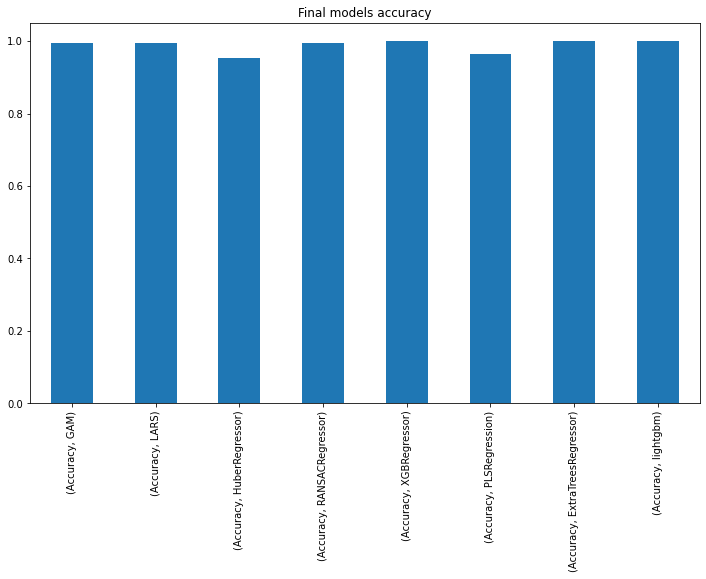

In [110]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')

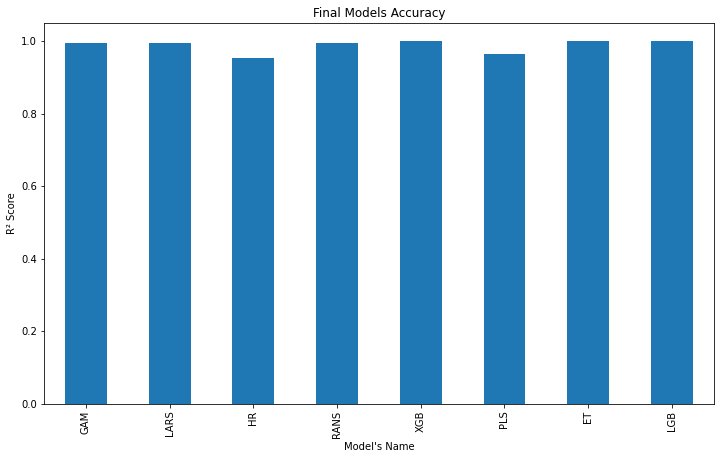

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming model1, model2, ..., model8 are defined and trained somewhere earlier in your code
# Assuming ytest and xtest are defined and contain your test data

# Create the DataFrame to hold R² scores
allacc = pd.DataFrame(columns=["R2 Score"], index=["GAM", "LARS", "HR",
                                                   "RANS", "XGB",
                                                   "PLS", "ET",
                                                   "LGB"])

# Dictionary of models
models = {'GAM': model1, 'LARS': model2, 'HR': model3, 'RANS': model4,
          'XGB': model5, 'PLS': model6, 'ET': model7,
          'LGB': model8}

# Calculate the R² score for each model and store it in the DataFrame
for name, model in models.items():
    allacc.loc[name, 'R2 Score'] = r2_score(ytest, model.predict(xtest))

# Plot the bar plot with only model names on the x-axis
allacc.plot(kind='bar', legend=False, figsize=(12, 7), title='Final Models Accuracy')

# Set the x-axis label to 'Model'
plt.xlabel("Model's Name")

# Set the y-axis label to 'R² Score'
plt.ylabel('R² Score')

# Show the plot
plt.show()


# Gradio

In [17]:
xtest.head()

,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
19060,8.7,581,23.0,1.0,11.0,12.0,4
17874,8.9,428,22.0,2.0,11.0,1.0,9
44423,8.3,391,17.0,1.0,21.0,1.0,2
36865,8.4,682,22.0,2.0,12.0,12.0,1
36537,8.5,488,22.0,3.0,12.0,1.0,10


In [18]:
xtest.columns

Index(['TariffRate', 'MonthlyHours', 'Refrigerator', 'AirConditioner',
       'Television', 'Monitor', 'Month'],
      dtype='object')

In [29]:
xtest.head()

,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
19060,8.7,581,23.0,1.0,11.0,12.0,4
17874,8.9,428,22.0,2.0,11.0,1.0,9
44423,8.3,391,17.0,1.0,21.0,1.0,2
36865,8.4,682,22.0,2.0,12.0,12.0,1
36537,8.5,488,22.0,3.0,12.0,1.0,10


In [30]:
xtrain.head()

,TariffRate,MonthlyHours,Refrigerator,AirConditioner,Television,Monitor,Month
12362,8.3,512,22.0,1.0,12.0,1.0,9
26357,8.2,577,23.0,3.0,11.0,12.0,2
22319,9.1,514,22.0,1.0,12.0,12.0,1
32505,7.7,565,22.0,1.0,3.0,1.0,10
43651,7.4,429,20.0,2.0,20.0,7.0,4


In [19]:
y.head()

,ElectricityBill
0,3225.6
1,3806.4
2,3203.2
3,4370.0
4,4204.4


In [43]:
xtrain.columns

Index(['TariffRate', 'MonthlyHours', 'Refrigerator', 'AirConditioner',
       'Television', 'Monitor', 'Month'],
      dtype='object')

In [59]:
import gradio as gr
def heart(TariffRate, MonthlyHours, Refrigerator, AirConditioner,Television, Monitor, Month):
    
    input_data = np.array([[TariffRate, MonthlyHours, Refrigerator, AirConditioner,Television, Monitor, Month]])
    ElectricityBill = model5.predict(input_data)
    return ElectricityBill

In [60]:
heart(8.7,581,23,1,11,12,4)

array([5056.249], dtype=float32)

In [61]:
interface = gr.Interface(
  fn = heart, #function = heart
  inputs = ['number','number','number','number','number','number','number'],
  outputs = ['number']  


).launch(share=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
